### Titanic Survival Prediction

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

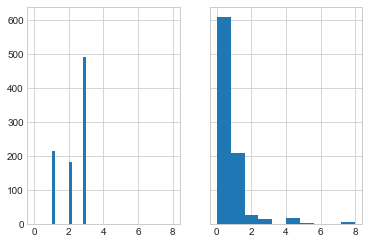

In [8]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
ax[0].hist(df_train['Pclass'])
ax[1].hist(df_train['SibSp'])

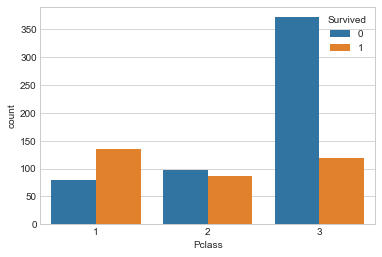

In [9]:
sns.countplot(df_train['Pclass'],hue=df_train['Survived'])
plt.show()

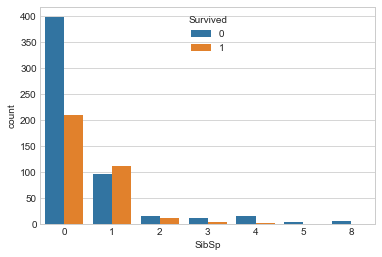

In [10]:
sns.countplot(df_train['SibSp'],hue=df_train['Survived'])
plt.show()

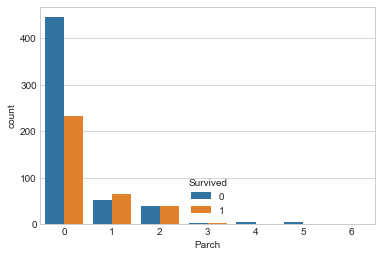

In [11]:
sns.countplot(df_train['Parch'],hue=df_train['Survived'])
plt.show()

### Data preprocessing

In [12]:
df_train.dropna(axis=0).shape

(183, 12)

In [13]:
df_train.shape

(891, 12)

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#Age and Cabin are not conisdered for now as they have null values
columns_required = ['Pclass','Sex','SibSp','Parch','Embarked'] 

In [16]:
X = df_train[columns_required]

In [17]:
df_train.shape

(891, 12)

In [18]:
y = df_train['Survived']

In [19]:
le = LabelEncoder()

In [20]:
X

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S
5,3,male,0,0,Q
6,1,male,0,0,S
7,3,male,3,1,S
8,3,female,0,2,S
9,2,female,1,0,C


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: int64(3), object(2)
memory usage: 34.9+ KB


In [22]:
X.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [23]:
X['Embarked'] = X['Embarked'].fillna('S')

C:\Users\LSK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
X.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [25]:
X = X.apply(le.fit_transform)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1986)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 5)
(268, 5)
(623,)
(268,)


In [28]:
df_default = DecisionTreeClassifier(max_depth=5)

In [29]:
df_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_pred = df_default.predict(X_test)

In [31]:
accuracy_score(y_pred,y_test)

0.8059701492537313

In [32]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# # Putting features
# features = list(df.columns[1:])
# features

In [33]:
# Putting features
features = list(X.columns)
features

['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [34]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

NameError: name 'dt_default' is not defined